In [1]:
__depends__ = [
    "../data/sr15_scenarios/sr15_scenarios.csv",
    "utils_openscm.py",
    "utils_config.py",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_UVIC.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_BERN.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_LLNL.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_CCSM1.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_CLIMBER.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_MPI.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_FRCGC.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_UMD2.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_HADLEY.CFG",
     "utils_magcfg.py",
]
__dest__ = [
    "../outputs/online_budget_runs.h5",
    "../outputs/online_budget_runs_permafrost.h5",
]

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Cell above is scons stuff to make sure our dependency tree work. We put a renaming in the cell below to make it clearer what is what.

In [3]:
SCENARIO_PATH = __depends__[0]
CARBON_CYCLE_FILES = {
    "UVIC": __depends__[3],
    "BERN": __depends__[4],
    "LLNL": __depends__[5],
    "CCSM1": __depends__[6],
    "CLIMBER": __depends__[7],
    "MPI": __depends__[8],
    "FRCGC": __depends__[9],
    "UMD2": __depends__[10],
    "HADLEY": __depends__[11],
}
OUTPUT_RUNS = __dest__[0]
OUTPUT_RUNS_PERMAFROST = __dest__[1]

<IPython.core.display.Javascript object>

# Online Budget Runs

In this notebook we perform the runs for the calculation of our online budget.

## Imports

In [4]:
import os
from distutils.util import strtobool

from openscm.scmdataframe import ScmDataFrame

from utils_openscm import save_scmdataframe, run_magicc6_with_scenarios
from utils_config import TEST_RUN
from utils_magcfg import get_carbon_cycle_cfgs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plotting Config

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from utils_plotting import setup

setup()

<IPython.core.display.Javascript object>

## Constants

In [6]:
SHOW_PLOTS = True and not strtobool(
    os.getenv("CI", "False")
)  # turn on if using the notebooks interactively

CARBON_CYCLES = get_carbon_cycle_cfgs(CARBON_CYCLE_FILES)

<IPython.core.display.Javascript object>

## Read in scenarios

In [7]:
scenarios = ScmDataFrame(SCENARIO_PATH)

<IPython.core.display.Javascript object>

INFO:root:>=13 labels, not applying legend


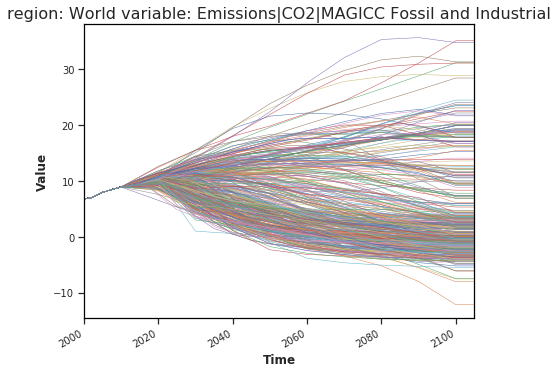

<IPython.core.display.Javascript object>

In [8]:
if SHOW_PLOTS:
    ax = scenarios.filter(
        variable="Emissions|CO2|MAGICC Fossil and Industrial", region="World"
    ).line_plot(linewidth=0.5)

INFO:root:>=13 labels, not applying legend


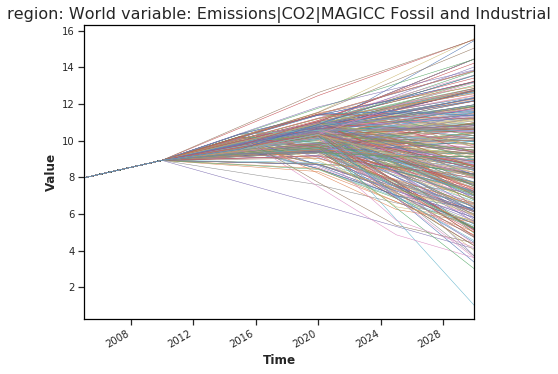

<IPython.core.display.Javascript object>

In [9]:
if SHOW_PLOTS:
    ax = scenarios.filter(
        variable="Emissions|CO2|MAGICC Fossil and Industrial",
        region="World",
        year=range(2005, 2031),
    ).line_plot(linewidth=0.5)

## Run MAGICC

Here we run MAGICC with the permafrost module on.

In [10]:
RUN_SETTINGS = {
    "endyear": 2110,  # avoid strange MAGICC end year behaviour
    "rf_total_runmodus": "all",
    "pf_apply": 1,
    "out_permafrost": 1,
    "co2_switchfromconc2emis_year": 1750,
    "co2_tempfeedback_yrstart": 1750,
    "co2_fertilization_yrstart": 1750,
}

<IPython.core.display.Javascript object>

In [11]:
for j, (cc, cc_config) in enumerate(CARBON_CYCLES.items()):
    if TEST_RUN and j > 2 and cc != "default":
        continue
    print(cc)
    settings = {**RUN_SETTINGS, **cc_config}
    res = run_magicc6_with_scenarios(scenarios, settings, test_run=TEST_RUN)
    res.set_meta(cc, name="carbon_cycle_tuning")
    out_run_file = (
        OUTPUT_RUNS
        if cc == "default"
        else OUTPUT_RUNS.replace(".h5", "_{}.h5".format(cc))
    )
    out_permafrost_file = (
        OUTPUT_RUNS_PERMAFROST
        if cc == "default"
        else OUTPUT_RUNS_PERMAFROST.replace(".h5", "_{}.h5".format(cc))
    )
    save_scmdataframe(res.filter(year=range(1, 2101), region="World"), out_run_file)
    save_scmdataframe(
        res.filter(
            year=range(1, 2110),
            region="World",
            variable=["*Permafrost*", "Em*CO2*", "*Temp*"],
        ),
        out_permafrost_file,
    )

/ |#                                                  | 0 Elapsed Time: 0:00:00

UVIC


| |           #                                     | 410 Elapsed Time: 0:06:21
numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
/ |#                                                  | 0 Elapsed Time: 0:00:00

BERN


| |            #                                    | 410 Elapsed Time: 0:06:20
/ |#                                                  | 0 Elapsed Time: 0:00:00

LLNL


| |                   #                             | 410 Elapsed Time: 0:06:20
/ |#                                                  | 0 Elapsed Time: 0:00:00

CCSM1


| | #                                               | 410 Elapsed Time: 0:06:22
/ |#                                                  | 0 Elapsed Time: 0:00:00

CLIMBER


| |              #                                  | 410 Elapsed Time: 0:06:23
/ |#                                                  | 0 Elapsed Time: 0:00:00

MPI


| |     #                                           | 410 Elapsed Time: 0:06:22
/ |#                                                  | 0 Elapsed Time: 0:00:00

FRCGC


| |  #                                              | 410 Elapsed Time: 0:06:22
/ |#                                                  | 0 Elapsed Time: 0:00:00

UMD2


| |         #                                       | 410 Elapsed Time: 0:06:23
/ |#                                                  | 0 Elapsed Time: 0:00:00

HADLEY


| |     #                                           | 410 Elapsed Time: 0:06:22
/ |#                                                  | 0 Elapsed Time: 0:00:00

default


| |   #                                             | 410 Elapsed Time: 0:06:22


<IPython.core.display.Javascript object>

In [12]:
res.head()

time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1765-01-01  \
model               scenario               region variable                   unit      climate_model todo endyear rf_total_runmodus pf_apply out_permafrost co2_switchfromconc2emis_year co2_tempfeedback_yrstart co2_fertilization_yrstart co2_detrituspool_initial co2_feedbackfactor_detritus co2_feedbackfactor_gpp co2_feedbackfactor_respiration co2_feedbackfactor_soil co2_fertilization_factor co2_fertilization_method co2_fraction_detritus_2_soil co2_fraction_gpp_2_detritus co2_fraction_gpp_2_plant co2_fraction_plant_2_detritus co2_gpp_initial co2_plantpool_initial co2_respiration_initial co2_soilpool_initial oceancc_scale_gasxchange oceancc_scale_impulseresponse oceancc_tempfeedback carbon_cycle_tuning               
AIM_2_0             ADVANCE_2020_1.5C-2100 World  Emissions|CO2|MAGICC AFOLU Gt C / yr MAGICC6       N/A  2110    all               1        1              1750                         1750                     1750                      92.7738                  -0.135782                   0.0107                 0.068459                       0.154088                0.648598                 1.100486                 0.001008                     0.399817                    0.448261                 0.998902                      66.2716         884.8584              12.26025                1681.525             1.833492                 0.949286                      0.037179             default                     0.0   
IMAGE_3_0_1         ADVANCE_2020_1.5C-2100 World  Emissions|CO2|MAGICC AFOLU Gt C / yr MAGICC6       N/A  2110    all               1        1              1750                         1750                     1750                      92.7738                  -0.135782                   0.0107                 0.068459                       0.154088                0.648598                 1.100486                 0.001008                     0.399817                    0.448261                 0.998902                      66.2716         884.8584              12.26025                1681.525             1.833492                 0.949286                      0.037179             default                     0.0   
MESSAGE-GLOBIOM_1_0 ADVANCE_2020_1.5C-2100 World  Emissions|CO2|MAGICC AFOLU Gt C / yr MAGICC6       N/A  2110    all               1        1              1750                         1750                     1750                      92.7738                  -0.135782                   0.0107                 0.068459                       0.154088                0.648598                 1.100486                 0.001008                     0.399817                    0.448261                 0.998902                      66.2716         884.8584              12.26025                1681.525             1.833492                 0.949286                      0.037179             default                     0.0   
POLES_ADVANCE       ADVANCE_2020_1.5C-2100 World  Emissions|CO2|MAGICC AFOLU Gt C / yr MAGICC6       N/A  2110    all               1        1              1750                         1750                     1750                      92.7738                  -0.135782                   0.0107                 0.068459                       0.154088                0.648598          

<IPython.core.display.Javascript object>

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
INFO:root:>=13 labels, not applying legend
INFO:root:>=13 labels, not applying legend
INFO:root:>=13 labels, not applying legend


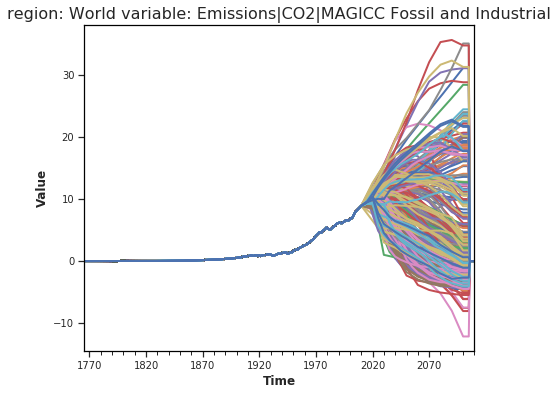

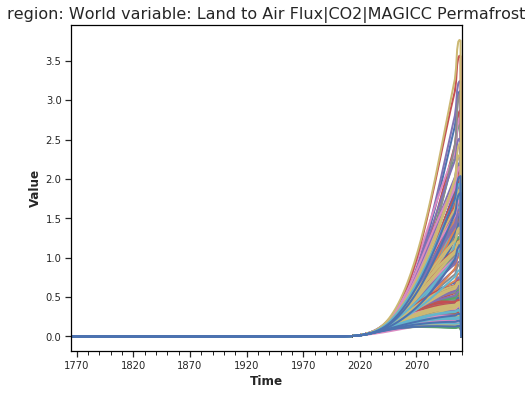

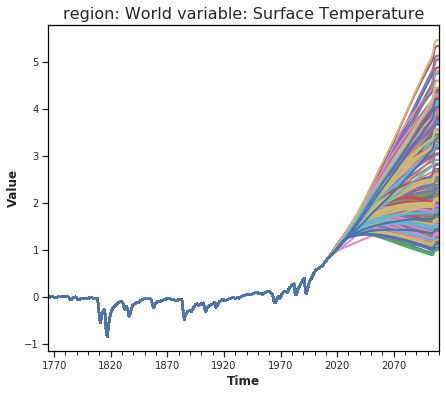

<IPython.core.display.Javascript object>

In [13]:
if SHOW_PLOTS:
    res.filter(variable="Emis*CO2*Fossil*", region="World").line_plot(
        x="time", color="model"
    )
    res.filter(variable="*Permafrost*", region="World").line_plot(
        x="time", color="model"
    )
    res.filter(variable="*Temperature*", region="World").line_plot(
        x="time", color="model"
    )